<a href="https://colab.research.google.com/github/AndresUrregoAngel/Python/blob/master/ML/Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main idea is walk throughout the different matplotlib figures to get in shape how to visualize data for ML purposes.

The first example is based on the Artist layer of matlib

In [0]:
# Histogram

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np

fig = Figure()
canvas = FigureCanvas(fig)

x = np.random.randn(10000)
ax = fig.add_subplot(111) # the 111 breaks down as 1 row , 1 column and first cell for the location of the new axis

ax.hist(x, 100)


ax.set_title('Normal distribution with $\mu=0, \sigma=1$')
fig.savefig('matplotlib_histogram.png') # Stores lcoally
print(x)
print(x.max(),x.mean())

[-0.0339767  -1.34415726  0.0347318  ... -0.70536867 -0.08689197
  0.10911267]
4.604092390714313 0.006710846330558527


  Scripting Layer

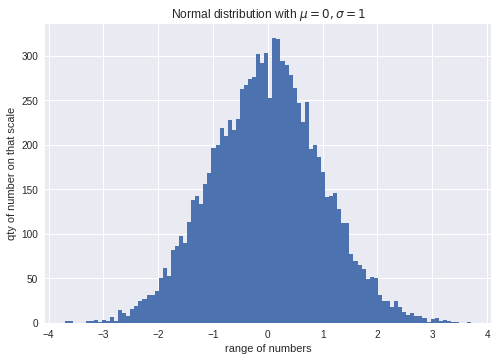

In [0]:
import matplotlib.pyplot as plt


x = np.random.randn(10000)
plt.hist(x, 100)
plt.title('Normal distribution with $\mu=0, \sigma=1$')
plt.xlabel('range of numbers')
plt.ylabel('qty of number on that scale')
plt.show()

pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

grouping: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

      QtyWoman
Age           
0.75         2
1.00         2


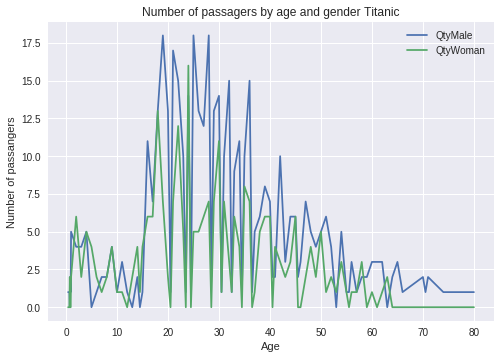

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/AndresUrregoAngel/Python_QuickCourse/master/Data/titanic.csv')

dfsex = df[['Sex','Age']]

# Filer by sex
dfmale  = dfsex.loc[dfsex['Sex'] == 'male']
dfwoman  = dfsex.loc[dfsex['Sex'] == 'female']

# Grouping

dfmale.columns =['QtyMale','Age']  # I need to change the column name before passed by the grouping
dfmaleg = dfmale.groupby('Age').count()

dfwoman.columns =['QtyWoman','Age']  # I need to change the column name before passed by the grouping
dfwomang = dfwoman.groupby('Age').count()
print(dfwomang.head(2))


# Get df for figures
dfg = pd.concat([dfmaleg,dfwomang], axis=1)
dfg['QtyMale'].fillna(0, inplace=True)
dfg['QtyWoman'].fillna(0, inplace=True)

dfg.plot(kind='line')
plt.ylabel('Number of passangers')
plt.title('Number of passagers by age and gender Titanic')
plt.show()

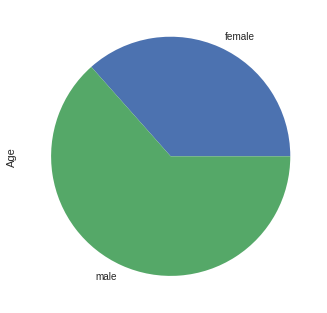

In [0]:
dfsex = df.groupby('Sex').count()

dfsex['Age'].plot(kind='pie')

In [31]:
df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)

df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

In [53]:
df_can.sort_values(['Total'],ascending=False,axis=0, inplace= True)
df_top5 = df_can.head(5)
df_top5.drop(['Total','Continent','Region','DevName'], axis=1, inplace=True)

df_top5 = df_top5.transpose()
df_top5.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


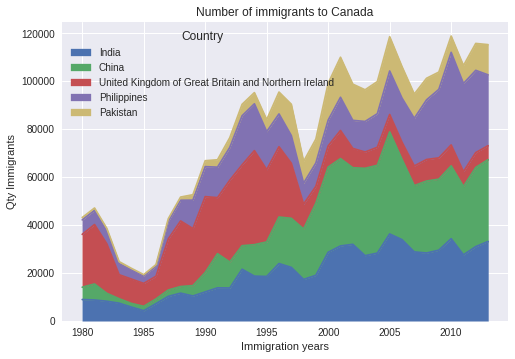

In [55]:
df_top5.plot(kind='area')
plt.ylabel('Qty Immigrants')
plt.xlabel('Immigration years')
plt.title('Number of immigrants to Canada')
plt.show()

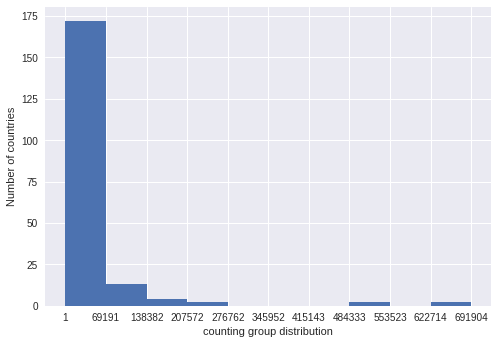

In [74]:
import numpy as np


df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region','2013' : 'histo'}, inplace=True)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df_can['Total'] = df_can.sum(axis=1)

# Get the right distribution of bins from the column required for the histogram
count, bin_edges = np.histogram(df_can['Total'])

df_can['Total'].plot(kind='hist', xticks = bin_edges)
plt.xlabel('counting group distribution')
plt.ylabel('Number of countries')
plt.show()
